In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,,,
2002-01-01,117.143,2002,1,50091.000000,182669300.0,4.2,177.7,5.7,142.0,1.73,109297.0,65820,24.183,12.287458
2002-02-01,117.844,2002,2,50156.000000,182823900.0,4.0,178.0,5.7,142.2,1.74,109297.0,65820,24.183,12.287458
2002-03-01,118.687,2002,3,50221.000000,183081600.0,4.1,178.5,5.7,143.2,1.73,109297.0,65820,24.183,12.287458
2002-04-01,119.610,2002,4,50286.000000,183315500.0,4.3,179.3,5.9,143.5,1.75,109297.0,65820,24.183,12.287458
2002-05-01,120.724,2002,5,50311.333333,183462600.0,4.0,179.5,5.8,143.8,1.75,109297.0,65820,24.183,12.287458


We don't need the month and year columns for our analysis. So, let's drop these colums.

In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

#### Analysis

Let's look at the correlation among the variables.

In [4]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
CSUSHPISA,1.000000,0.898495,0.615358,-0.003090,0.758873,-0.417781,0.837850,0.090754,0.727059,0.875504,0.798555,0.809353
Per_Capita_GDP,0.898495,1.000000,0.854830,-0.056310,0.935778,-0.365876,0.917775,-0.156267,0.932385,0.840443,0.914843,0.942338
Working_Population,0.615358,0.854830,1.000000,0.106873,0.953791,-0.021918,0.839777,-0.397721,0.964129,0.554608,0.885557,0.847212
Houses,-0.003090,-0.056310,0.106873,1.000000,0.022628,0.154169,0.065733,0.188011,-0.041797,-0.116744,-0.011297,-0.171331
CPI,0.758873,0.935778,0.953791,0.022628,1.000000,-0.085628,0.945745,-0.402188,0.985237,0.691745,0.963519,0.949129
UNRATE,-0.417781,-0.365876,-0.021918,0.154169,-0.085628,1.000000,-0.119076,-0.522191,-0.134564,-0.451075,-0.019445,-0.184371
Cons_Materials,0.837850,0.917775,0.839777,0.065733,0.945745,-0.119076,1.000000,-0.340674,0.895235,0.679619,0.930360,0.903820
FEDFUNDS,0.090754,-0.156267,-0.397721,0.188011,-0.402188,-0.522191,-0.340674,1.000000,-0.395402,0.065579,-0.404408,-0.381854
Num_Households,0.727059,0.932385,0.964129,-0.041797,0.985237,-0.134564,0.895235,-0.395402,1.000000,0.707769,0.946530,0.952418
Income,0.875504,0.840443,0.554608,-0.116744,0.691745,-0.451075,0.679619,0.065579,0.707769,1.000000,0.757992,0.826818


In [5]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

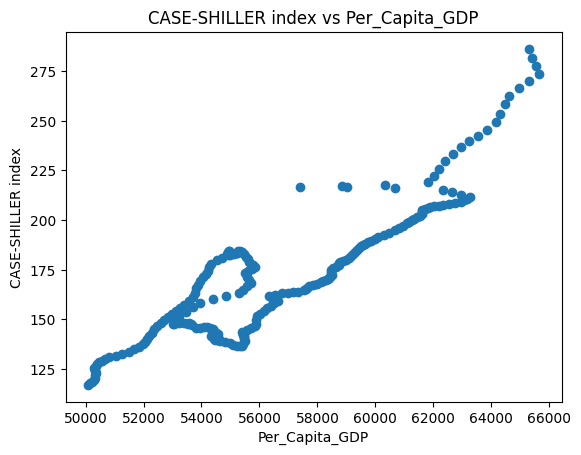

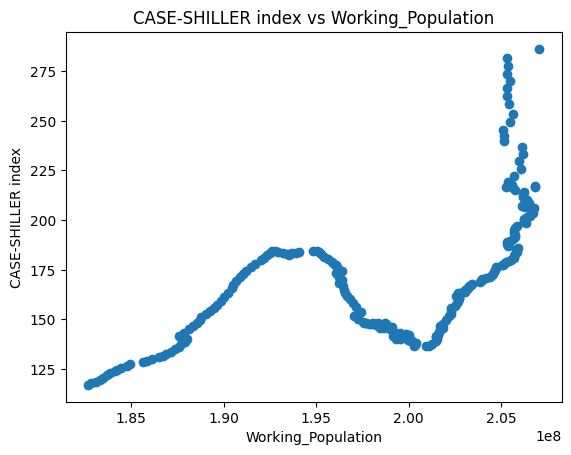

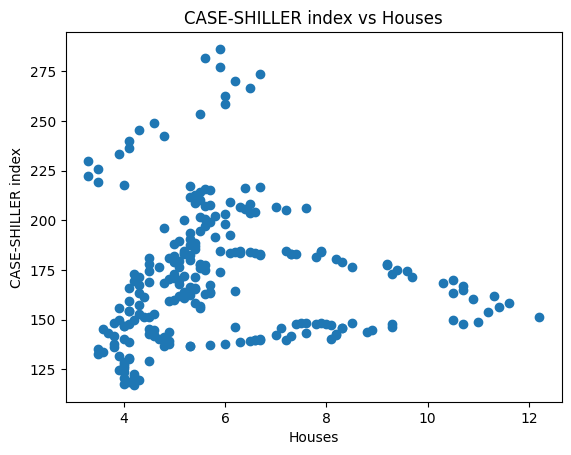

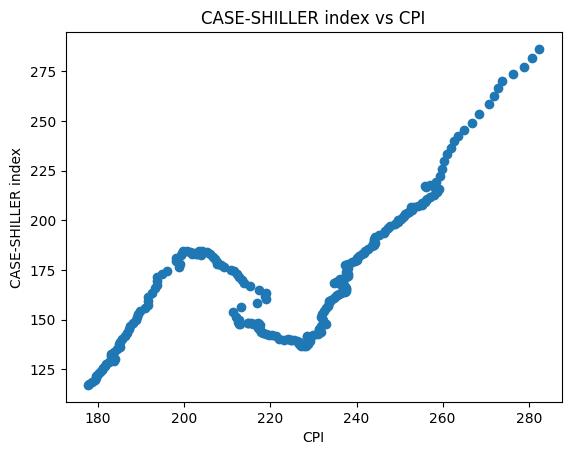

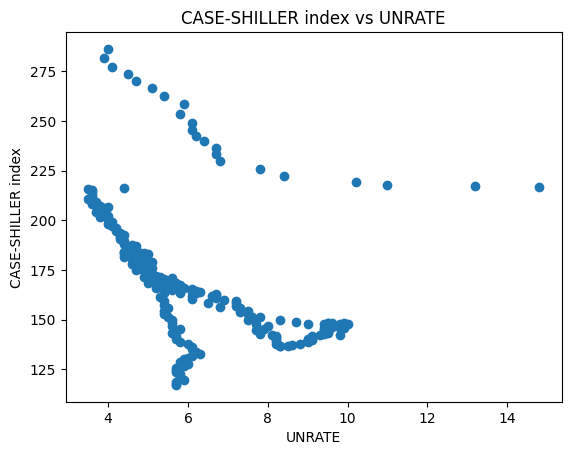

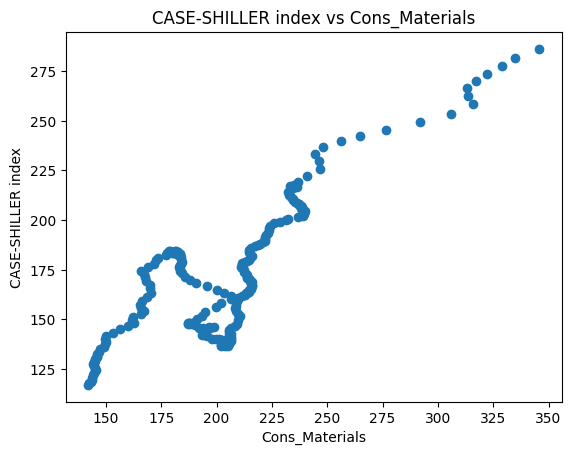

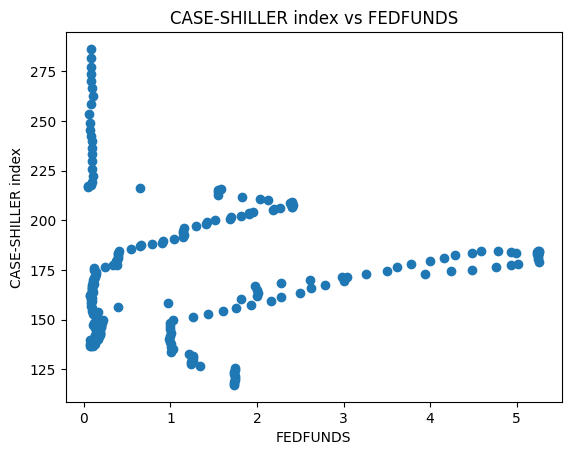

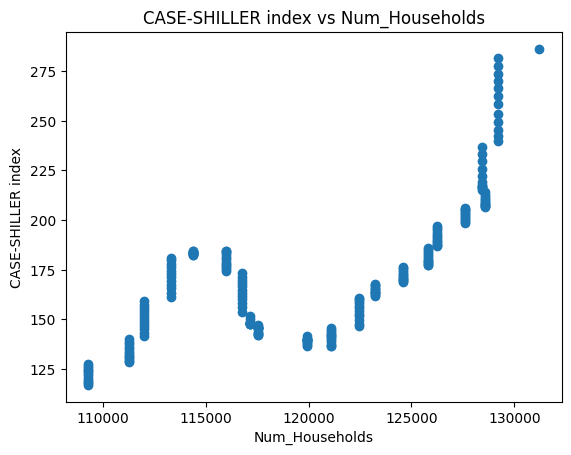

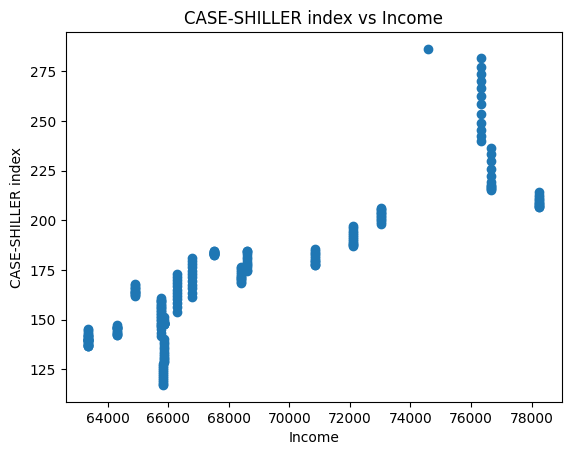

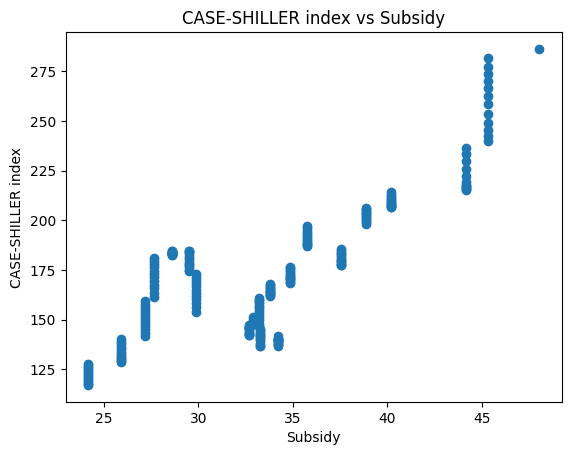

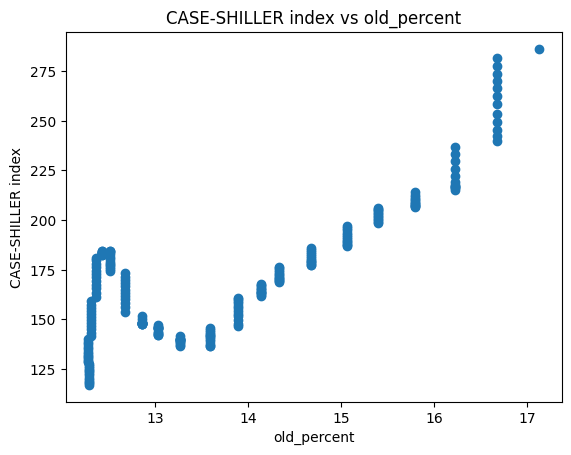

In [6]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made-

- Unemployment rate is negatively correlated with the home prices. Which makes sense.
- Number of new houses has almost 0 and negative correlation. This is unexpected as one would think that the number of houses supplied should also affect home prices. Maybe the number of new houses built are not enough to bring the prices down significantly.
- Impact of the great recession is reflected in almost all the plots.
- All the other variables are positively correlated with the home prices.

From the correlation matrix above, it can be seen that several pairs of independent variables have high correlation. Let's drop one column from each such pair as they will cause multicollinearity. We will drop the column which has lower correlation with the target.

In [7]:
# Dropping multicollinearity columns
mult_cols = ["Working_Population", "Houses", "Num_Households", 
             "Subsidy", "old_percent", "Cons_Materials", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df

### Model Building

In [8]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [9]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [10]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.912281847712342


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [11]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 238.27363790025623
The coefficient for CPI is -104.49173862643246
The coefficient for UNRATE is 49.0846558961073
The coefficient for FEDFUNDS is 22.50658833716362


Here are the four features that I used in the model and their description:

**1. Gross Domestic Product (GDP):**
The total monetary value of all goods and services produced within the United States during a specified period.
A fundamental measure of economic performance, reflecting the overall economic health and growth trends of the country.
For every unit increase in Per Capita GDP, the home price index increases by 238.27 units, assuming other factors remain constant.

**2. Consumer Price Index (CPI):**
A measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.
A key indicator for assessing inflation or deflation, influencing consumer spending behavior and economic policy decisions.
For every unit increase in the CPI, the home price index decreases by 104.49 units, assuming other factors remain constant.

**3. Unemployment Rates:**
The percentage of the labor force that is currently unemployed and actively seeking employment.
A crucial indicator of labor market health and economic stability, influencing government policies and social welfare programs.
For every unit increase in the unemployment rate, the home price index increases by 49.08 units, assuming other factors remain constant.This might seem counterintuitive, and we would investigte this further.

**4. FED Funds Rate:**
The interest rate at which depository institutions lend reserve balances to other depository institutions overnight, as set by the Federal Reserve.
This rate is a primary tool for monetary policy, influencing borrowing costs and, subsequently, overall economic activity.
For every unit increase in the Fed Funds Rate, the home price index increases by 22.50 units, assuming other factors remain constant.

In [12]:
# The intercept
print("The intercept is: ", model.intercept_)


The intercept is:  101.81831081292545


The intercept in our linear regression model is approximately `101.82`. This value represents the expected value of the Home Price Index when all the independent variables (Per Capita GDP, Number of Houses Built, Unemployment Rate, and Fed Funds Rate) are equal to zero.




**The coefficients of the variables are not in sync with their correlation coefficients with the target variable. For example, the coefficient of "UNRATE" (unemployment rate) is positive. It does not make sense as a rise in unemployment will surely lead to a decrease in the home prices. So, the question arises, why did this happen?**

I found the answer on [https://www.researchgate.net/post/What-does-it-indicating-If-there-is-positive-correlation-but-negative-regression-coefficient] .

"... reason is what some call "real suppression". In this case suppression occurs because an important predictor variable, necessary in understanding the true relationship between the latent variables, suppresses the effect of another predictor variable."

As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.

A few variables that could have been studied are below.

- Urban Population.
- Net-immigration (It is supposed to have a positive impact. No suitable data could be found)
- Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)
- Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)
- Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)
- Tax Rate (Too many brackets (7) and could not analyse due to time)
- Number of active listings (Data prior to 2017 was not found)